# Long Short Pair Analysis

Diego Alvarez 04/27/2023

## Packages

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from LSPair import *

## Collect Sample Data

In [3]:
try:

    df = pd.read_parquet(
        path = "agency_df.parquet", 
        engine = "pyarrow")
  
    end_date = dt.date(year = 2023, month = 4, day = 5)
    start_date = dt.date(year = end_date.year - 6, month = 1, day = 1)

except:

    tickers = ["CMBS", "VMBS", "MBB"]
    end_date = dt.date(year = 2023, month = 4, day = 5)
    start_date = dt.date(year = end_date.year - 6, month = 1, day = 1)

    df = (yf.download(
        tickers = tickers,
        start = start_date,
        end = end_date).
        reset_index().
        melt(id_vars = "Date").
        rename(columns = {
            "variable_0": "ticker_type", 
            "variable_1": "ticker"}))

    df.to_parquet(
        path = "agency_df.parquet",
        engine = "pyarrow")

## Prep Data (pass values as returns)

In [4]:
df_input = (df.query(
    "ticker_type == 'Adj Close'").
    drop(columns = ["ticker_type"]).
    pivot(index = "Date", columns = "ticker", values = "value").
    pct_change().
    dropna())

In [5]:
df_input.head(3)

ticker,CMBS,MBB,VMBS
Date,,,
2017-01-04,0.000983,-0.000282,-0.000382
2017-01-05,0.008049,0.003009,0.004778
2017-01-06,-0.005258,-0.002343,-0.002092


## Create LSPair Object Instance

In [6]:
ls_pair = LSPair(
    long_position = df_input.VMBS,
    short_position = df_input.CMBS,
    benchmark = df_input.MBB)

## Object Instance Runs the regression

Sample OLS model, there are regressions for long & short leg as well as in-sample, out-of-sample, and full-sample. Sample ratio is preset parameter in initialization. Below is an example

In [7]:
(ls_pair.in_sample_long_lm_res)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     560.6
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.81e-100
Time:                        19:57:38   Log-Likelihood:                 5343.8
No. Observations:                1101   AIC:                        -1.068e+04
Df Residuals:                    1099   BIC:                        -1.067e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.755e-05    5.7e-05      0.659      0.510   -7.43e-05       0.000
x1             0.6569      0.028     23.676      0.000       0.602       0.711
==============================================================================
Omnibus:                     1174.122   Durbin-Watson:                   2.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1024907.664
Skew:                           4.147   Prob(JB):                         0.00
Kurtosis:                     152.240   Cond. No.                         487.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Same for plotting the regression

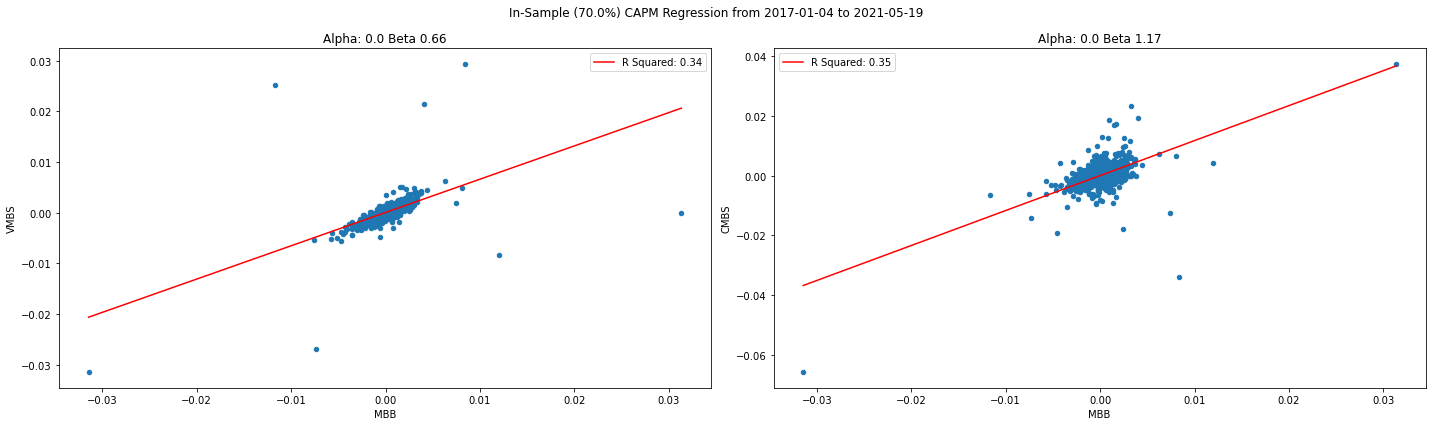

In [8]:
ls_pair.plot_regress()

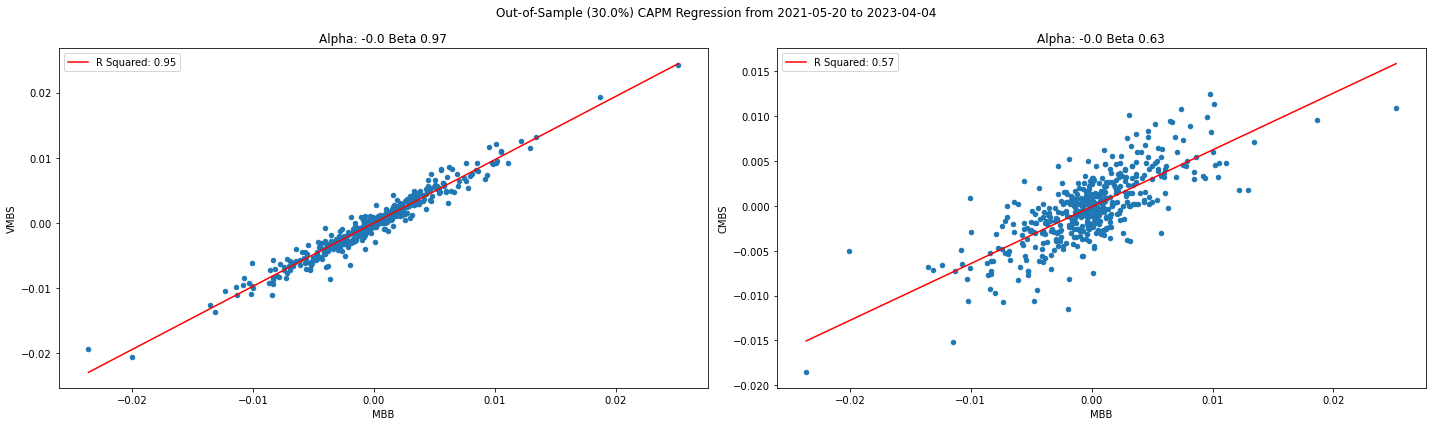

In [9]:
ls_pair.plot_out_regress()

You can also plot cumulative returns

C:\Users\Diego\Desktop\app_prod\LSPair\LSPair.py:395: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


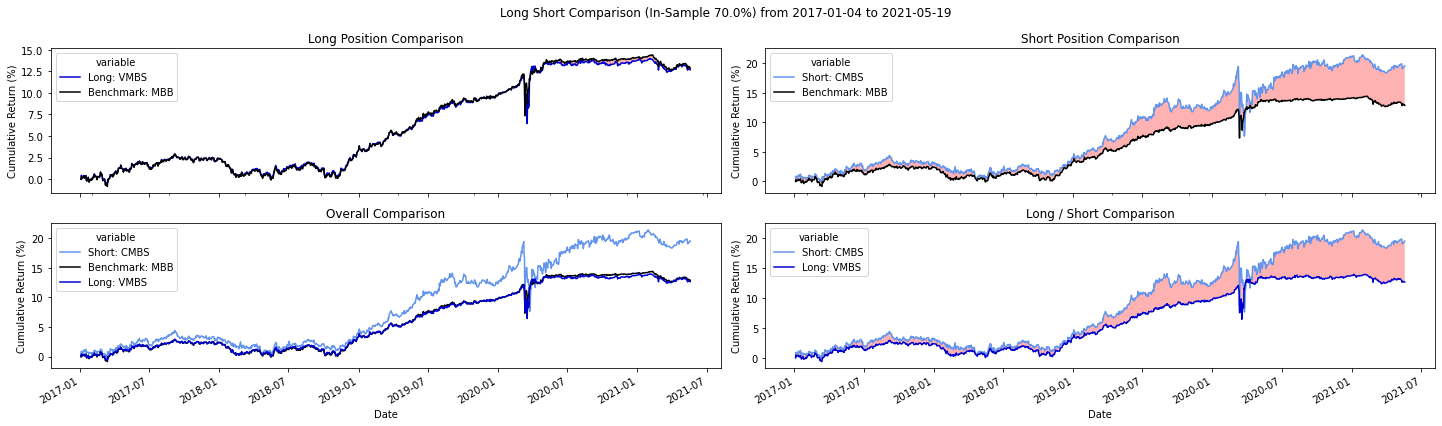

In [10]:
ls_pair.plot_cum()

You can run a 50/50 rebalance daily 

pandas.core.frame.DataFrame

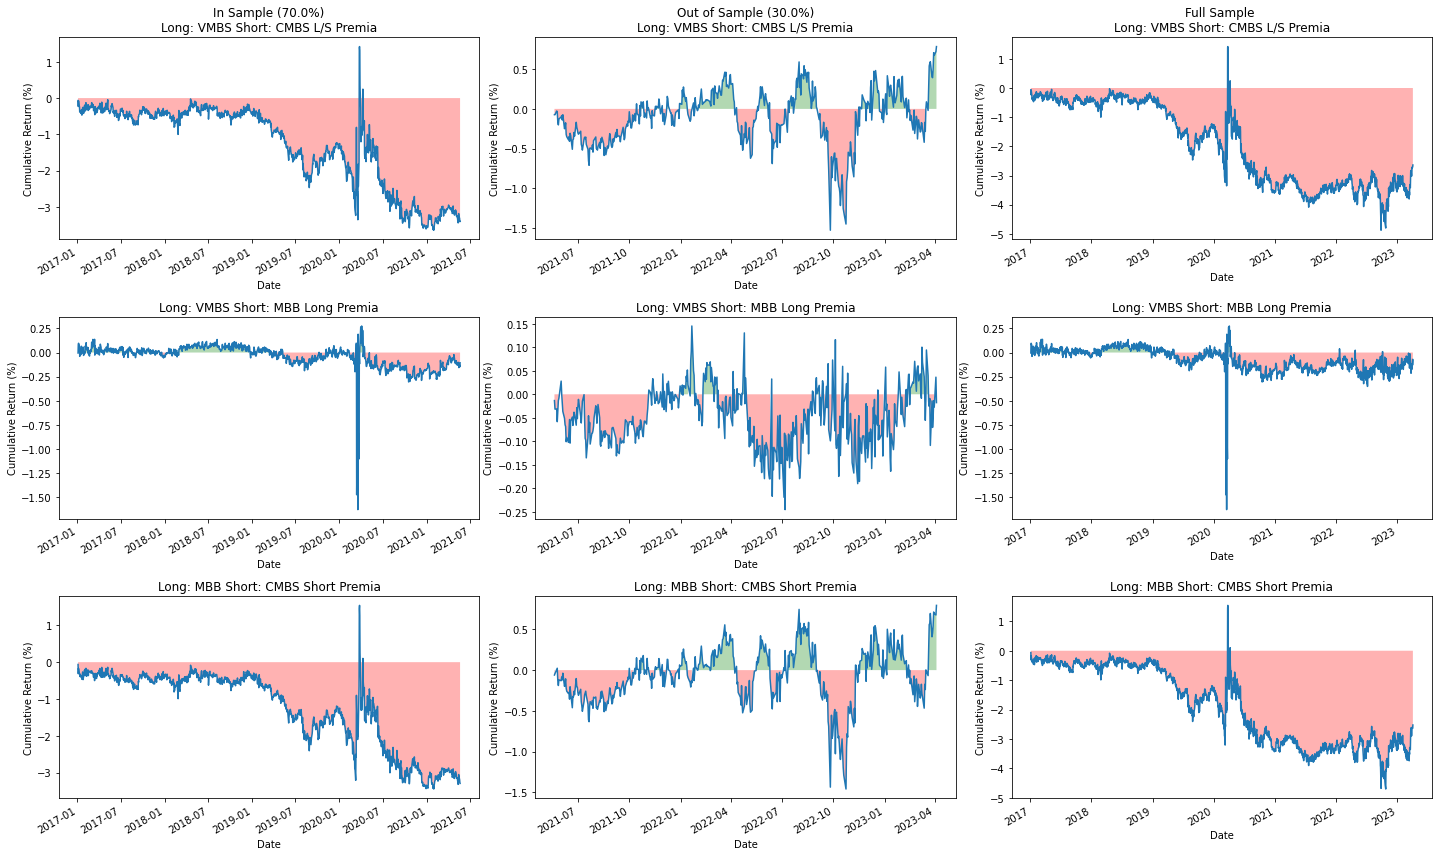

In [11]:
ls_pair.generate_even_rebal_risk_premia()